# load libraries

In [102]:
from google.colab import drive
drive.mount('/content/drive')
#!pip install shap
#!pip install pyitlib
import os
os.path.abspath(os.getcwd())
os.chdir('/content/drive/My Drive/Protein project')
os.path.abspath(os.getcwd())

import warnings
warnings.filterwarnings("ignore")
from __future__ import division ###for float operation
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score ##tp / (tp + fn)
from sklearn.metrics import precision_score #tp / (tp + fp)
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import KFold, StratifiedKFold
#from pyitlib import discrete_random_variable as drv
import time 
import timeit 
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted ### Checks if the estimator is fitted by verifying the presence of fitted attributes (ending with a trailing underscore)
#from sklearn.utils.multiclass import unique_labels, not necessary, can be replaced by array(list(set()))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### P450

In [0]:
def readData(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		lineStrip = line.strip().replace('"','')
		lineList =	lineStrip.split('\t')
		returnData.append(lineList)###['3','2',...]
	return returnData

"""first case P450 = [['1','1',....],[],[].....,[]]  second case P450 = array([['1','1',....],[],[].....,[]]), third case P450 = """
P450 = readData('P450.txt') ### [[],[],[],....[]]
P450 = np.array(P450) ### either [['1','1',....],[],[].....,[]] or array([['1','1',....],[],[].....,[]]) works, but note that keys are '1', '0' 
#P450 = P450.astype(int) ### for shap array [[1,1,....],[],[].....,[]], keys are 1, 0 

M=np.matrix([[245,   9,   0,   3,   0,   2,  65,   8],
[9, 218,  17,  17,  49,  10,  50,  17],
[0,  17, 175,  16,  25,  13,   0,  46],
[3,  17,  16, 194,  19,   0,   0,   3],
[0,  49,  25,  19, 199,  10,   0,   3],
[2,  10,  13,   0,  10, 249,  50,  74],
[65,  50,   0,   0,   0,  50, 262,  11],
[8,  17,  46,   3,   3,  74,  11, 175]])

X = P450[:,0:8]
y = P450[:,-1]

##### lactamase

In [0]:
def readData2(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		linestr = line.strip().replace(', ','')
		lineList =	list(linestr)
		returnData.append(lineList)###['3','2',...]
	return returnData

lactamase = readData2('lactamase.txt')
lactamase = np.array(lactamase)
#lactamase = lactamase.astype(int)
M2 = np.matrix([[101, 5, 0, 2, 0, 14, 4, 37],
[5 ,15, 14 ,1 ,7 ,7, 0 ,19],
[0, 14, 266, 15, 14, 2, 26, 4],
[2, 1, 15, 28, 2 ,15, 4, 0],
[0, 7, 14, 2, 32, 9 ,0, 8],
[14, 7, 2 ,15, 9, 29, 7, 9],
[4, 0, 26, 4 ,0 ,7 ,72, 21],
[37, 19, 4, 0, 8, 9, 21, 211]])

X2 = lactamase[:,0:8]
y2 = lactamase[:,-1]

##### lymph

In [0]:
def readarff(filename):
  arrfFile = open(filename)
  lines = [line.rstrip('\n') for line in arrfFile]
  data = [[]]
  index = 0
  for line in lines :
      if(line.startswith('@attribute')) :
          index+=1
      elif(not line.startswith('@data') and not line.startswith('@relation') and not line.startswith('%')) :
          data.append(line.split(','))
  del data[0]
  return data


lymph_train = readarff("github_bn_code/lymph_train.arff.txt"); lymph_train = np.array(lymph_train)  
lymph_test = readarff("github_bn_code/lymph_test.arff.txt") ;lymph_test = np.array(lymph_test)

lymph = np.concatenate((lymph_train,lymph_test))

X10 = lymph[:,0:18]
y10 = lymph[:,-1]

##### vote

In [0]:
vote_train = readarff("github_bn_code/vote_train.arff.txt") ;vote_train = np.array(vote_train)
vote_test = readarff("github_bn_code/vote_test.arff.txt")  ; vote_test = np.array(vote_test)

vote = np.concatenate((vote_train,vote_test))
X11 = vote[:,0:16]
y11 = vote[:,-1]

##### german

In [0]:
def readData3(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(' ')
		returnData.append(lineList)###['3','2',...]
	return returnData

german = readData3("data folder/german.data")
german = np.array(german)

X15 = german[:,0:20]
y15 = german[:,-1] 

##### nurse

In [0]:
def readData3(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(',')
		returnData.append(lineList)###['3','2',...]
	return returnData

nurse = readData3("data folder/nursery.data")
nurse.pop()
nurse = np.array(nurse)

X3 = nurse[:,0:8]
y3 = nurse[:,-1] 

In [0]:
import pandas as pd
pd.Series(y3).value_counts()

##### car

In [0]:
def readData4(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(',')
		returnData.append(lineList)###['3','2',...]
	return returnData

car = readData4("data folder/car.data")
car = np.array(car)
X6 = car[:,0:6]
y6 = car[:,-1] 

In [168]:
import pandas as pd
pd.Series(y6).value_counts()
set(y6)

{'acc', 'good', 'unacc', 'vgood'}

# generate PU data

In [0]:
class PUgenerator:
  def __init__(self):
      pass

  def fit(self,X,y,n_L,n_U,random_state = 42,pos_label = '1'):
    """ Implementation of a fitting function.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels in classification, real numbers in
            regression).
        n_L : Scalar
              Number of labeled examples
        n_U : Scalar
              Number of Unlabeled examples
        random_state : Scalar
              set seed for Pu data generation
        pos_label : 

        Returns
        -------
        
      """
    # print("just arrived in the fit function--",id(X))
    X,y = check_X_y(X,y)
    data = np.concatenate((X, y.reshape(-1,1)), axis=1)
    # print("after check_X_y --",id(X))
    n,p = X.shape
    y = y.astype(str)
    # row_inx_0 = [row for row in range(n) if y[row] == '0']
    row_inx_1 = [row for row in range(n) if y[row] == pos_label]
    
    # sample labeled positive from X_1_total
    X_1_total = X[row_inx_1,:]
    np.random.seed(random_state) # set seed for np.random
    row_inx_L = np.random.choice(X_1_total.shape[0], n_L,replace=True)
    X_labeled = X_1_total[row_inx_L,:]

    # sample from unlabeled X
    np.random.seed(random_state*3) # set seed for random
    np.random.shuffle(data) # save memory space than permutation, since no copy needed
    # print("after permutation--",id(X))
    np.random.seed(random_state*2)
    row_inx_U = np.random.choice(n, n_U,replace=True) # set seed for np.random
    X_Unlabeled = data[row_inx_U,0:p]
    y_Unlabeled = data[row_inx_U,-1]
    y_Unlabeled = np.where(y_Unlabeled == pos_label,'1','0')
    self.X_1abeled_ , self.X_Unlabeled_, self.prevalence_ ,self.X_true_, self.X_1_true, self.p_, self.y_Unlabeled_ = X_labeled,X_Unlabeled, len(row_inx_1)/n, X, X_1_total,p,y_Unlabeled
    return self

  def value_count(self):
    X_true = pd.DataFrame(self.X_true_)
    X_L = pd.DataFrame(self.X_1abeled_)
    X_U = pd.DataFrame(self.X_Unlabeled_)
    X_1_true = pd.DataFrame(self.X_1_true)

    X_true_count = X_true.apply(pd.Series.value_counts)
    X_L_count = X_L.apply(pd.Series.value_counts)
    X_U_count = X_U.apply(pd.Series.value_counts)
    X_1_true_count = X_1_true.apply(pd.Series.value_counts)
    return X_true_count,X_L_count,X_U_count,X_1_true_count

  def plot_dist(self):
    X_true_count,X_L_count,X_U_count,X_1_true_count = self.value_count()
    
    # X_true_count  vs X_U_count
    X_true_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Population, f(x)",sharex = False)
    X_U_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Unlabeled, f(x|s=0)",sharex = False)
    
    #print(15*'__')
    # X_1_true_count vs X_L_count
    X_1_true_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Positive population, f(x|y=1)",sharex = False)
    X_L_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Labeled, f(x|s=1)",sharex = False)


##### lymph

In [132]:
lym_pu = PUgenerator()
lym_pu.fit(X10,y10,50,100,pos_label = 'malign_lymph')
print(lym_pu.prevalence_)
lym_pu.y_Unlabeled_

0.4295774647887324


array(['1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1',
       '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1',
       '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '0', '1'], dtype='<U1')

##### P450

In [6]:
p450_pu = PUgenerator()
p450_pu.fit(X,y,400,800)
p450_pu.prevalence_
#p450_pu.plot_dist()

0.6534031413612565

##### lactamase

In [5]:
lact_pu = PUgenerator()
lact_pu.fit(X2,y2,300,600)
lact_pu.prevalence_

0.20108695652173914

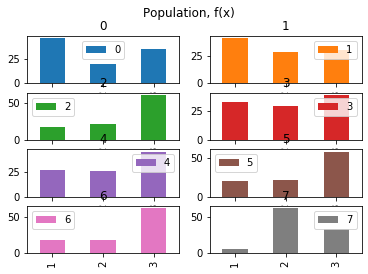

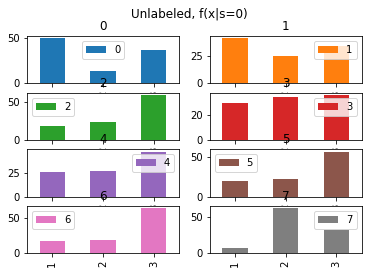

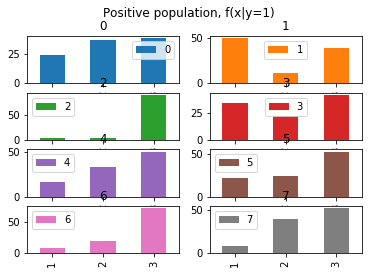

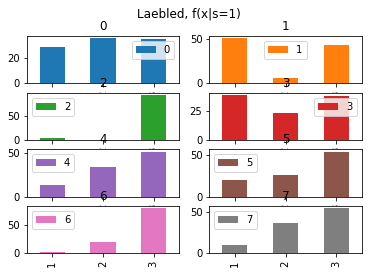

In [0]:
lact_pu.plot_dist()

# Bayesian class

In [0]:
"""
Bayesian network implementation for Postitive Unlabeled examples
API inspired by SciKit-learn.
"""

class Bayes_net_PU(BaseEstimator, ClassifierMixin): 

    def predict_proba(self, X): ### key prediction methods, all other prediction methods will use it first.
      raise NotImplementedError

    def predict(self, X):
      """
        Perform classification on an array of test vectors X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        C : ndarray of shape (n_samples,1)
            Predicted target values for X
      """
      Prob_1 = self.predict_proba(X) 
      return(np.where(Prob_1 > 0.5, '1', '0'))

    def Conditional_log_likelihood(self,y_true,y_pred_prob): 
      """Calculate the conditional log likelihood.
      :param y_true: The true class labels. e.g ['1','1',.....'0','0']
      :param y_pred_prob: np.array shows prob of class '1' for each instance.
      :return: CLL. A scalar.
      """
      cll = []
      for i in range(len(y_pred_prob)):
        cll.append(y_pred_prob[i] if y_true[i] == '1' else 1-y_pred_prob[i] )

      cll = [np.log2(ele) for ele in cll]
      cll = np.array(cll)
      return(sum(cll))
 
    def plot_tree_structure(self,mapping = None,figsize = (5,5)):
      check_is_fitted(self)
      parent = self.parent_
      egdes = [(k,v) for v,k in parent.items() if k is not None]
      G = nx.MultiDiGraph()
      G.add_edges_from(egdes)
      #mapping=dict(zip(range(8),['b0','b1','b2','b3','b4','b5','b6','b7']))
      plt.figure(figsize=figsize)
      nx.draw_networkx(G,nx.shell_layout(G))



## PNB

In [0]:
class PNB(Bayes_net_PU):
  name = "PNB"
  def __init__(self, alpha = 1):
      self.alpha = alpha

  def fit(self,X_L, X_u, pri, M = None):  
    """ Implementation of a fitting function.
        Parameters
        ----------
        X_l : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input positive labeled samples.
        X_u : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input unlabeled samples.
        pri : scalar.
            The prevalence probability (p(y = 1))
        Returns
        -------
        self : object
            Returns self.
      """

    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    # 1: Learned from positive examples, P(xij|1) = N_L(xij)/N_L.  N_L(xij) 
    # 2: Learned from Unlabeled examples, N_U(xij)
    # 3: P(xi = j|c = 0), Listprob0, calculated from previous list
    n_L,p = X_L.shape
    n_u,p = X_u.shape
    #
    List_count_1 = {} 
    List_prob_1 = {} # {x0:{'1': p(x0 =1|y=1), '2': p(x0 =2|y=1), 'else': }, x1:{},   ... x7:{} }
    #
    List_count_U = {} 
    #
    List_prob_0 = {} # P(xi = j|c=0)
    K = {} # X_i_L and X_i_u contains all possible values of x_i, there are not other values, different from supervised setting.
    for i in range(p):
      x_i_L = X_L[:,i]
      x_i_u = X_u[:,i]
      x_i_L_counter = Counter(x_i_L) # may be not need key error
      x_i_u_counter = Counter(x_i_u)
      x_i_values = set(x_i_L_counter.keys()).union(x_i_u_counter.keys()) # all possible values of x_i
      K[i] = len(list(x_i_values))
      # part 1
      x_i_L_prob = {key: (value + self.alpha) / (n_L + self.alpha * (K[i]) ) for key,value in x_i_L_counter.items()} # p(x|s=1) = p(x|y=1)
      x_i_L_prob.update({key: (0 + self.alpha) / (n_L + self.alpha * (K[i]) )  for key in list(x_i_values) if key not in list(x_i_L_counter.keys()) } )
      List_prob_1[i] = x_i_L_prob
      List_count_1[i] = x_i_L_counter
      # part 2
      List_count_U[i] = x_i_u_counter
      # part 3
      x_i_0_prob = {key: max([0,x_i_u_counter[key] - x_i_L_prob[key] * pri * n_u]) for key in list(x_i_values)} # numeritor, can be negative, make it >=0
      x_i_0_prob = {key:(self.alpha + value)/ (K[i]*self.alpha + n_u * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
      x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
      List_prob_0[i] = x_i_0_prob
      # x_i_0_prob = {key: value/sum(np.array(list(x_i_0_prob.values()))) for key,value in x_i_0_prob.items()    }
    self.is_fitted_ = True  
    self.n_features_, self.K_, self.List_count_1_,self.List_prob_1_, self.List_count_U_, self.List_prob_0_, self.prevalence_ = p, K, List_count_1,List_prob_1,List_count_U,List_prob_0, pri
    return self

  def predict_proba(self,X): 
    """
        Return probability estimates for the test vector X. Usually it would be X_unlabeled
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        C : array-like of shape (n_samples, )
            Returns the probability of the samples for each class in
            the model. 
    """
    check_is_fitted(self)
    X = check_array(X)
    Prob_1 = []
    for ins in X:
      P1 = self.prevalence_ # don't need copy, immutable
      P0 = 1 - P1
      for i in range(self.n_features_):
        P1 = P1 * (self.List_prob_1_[i][ins[i]]) 
        P0 = P0 * (self.List_prob_0_[i][ins[i]]) 
        # normalize proba
      P = P1 + P0
      P1 = P1/P; P0 = P0/P
      Prob_1.append(P1)

    Prob_1 = np.array(Prob_1) # for shap 
    return Prob_1

    

##### P450

In [108]:
pnb = PNB()
pnb.fit(p450_pu.X_1abeled_,p450_pu.X_Unlabeled_, p450_pu.prevalence_)
#p450_pu.prevalence_
print(p450_pu.y_Unlabeled_[0:20])
print(pnb.predict(p450_pu.X_Unlabeled_)[0:20])
print(accuracy_score(p450_pu.y_Unlabeled_,pnb.predict(p450_pu.X_Unlabeled_)) )
print(pnb.Conditional_log_likelihood(p450_pu.y_Unlabeled_,pnb.predict_proba(p450_pu.X_Unlabeled_)))
precision_score(p450_pu.y_Unlabeled_, 
         pnb.predict(p450_pu.X_Unlabeled_), 
         average='macro') 

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '1'
 '1' '0']
['0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0' '1' '1' '1'
 '1' '1']
0.805
-524.7846955096054


0.7858937198067633

##### lactmase

In [109]:
pnb = PNB()
pnb.fit(lact_pu.X_1abeled_,lact_pu.X_Unlabeled_, lact_pu.prevalence_)
#lact_pu.prevalence_
print(lact_pu.y_Unlabeled_[0:20])
print(pnb.predict(lact_pu.X_Unlabeled_[0:20,:]))
print(accuracy_score(lact_pu.y_Unlabeled_,pnb.predict(lact_pu.X_Unlabeled_)) )
pnb.Conditional_log_likelihood(lact_pu.y_Unlabeled_,pnb.predict_proba(lact_pu.X_Unlabeled_))

['0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']
['0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']
0.8683333333333333


-289.0884739393357

## PTAN

In [0]:
class PTAN(Bayes_net_PU):
    name = "PTAN"
    def __init__(self, alpha = 1,starting_node = 0):
      self.starting_node = starting_node
      self.alpha = alpha
    
    def get_mutual_inf(self,X_L, X_u, pri, M = None):
      """get PU conditional mutual inf of all pairs of features, part of training
        Parameters
        ----------
        X_l : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input positive labeled samples.
        X_u : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input unlabeled samples.
        pri : scalar.
            The prevalence probability (p(y = 1))
        Returns
        -------
        np.array matrix.
      """
      X_L = check_array(X_L)
      X_u = check_array(X_u)
      if X_L.shape[1] != X_u.shape[1]:
        raise ValueError('labeled data and unlabeled data have different number of features ')
      n_L,p = X_L.shape
      n_u,p = X_u.shape
      M = np.zeros((p,p)) # will not change global M, since new memory assigned for this local M
      # part 1: proba that can be estimated from labeled examples. 1 P(xij,xkl|1), 2 p(xj|1), 3 p(xkl|1). P(xij,xkl|1) = N_L(xi=j,xk=l)/N_L
      # part 2: P(xij,xkl) from U, P(xij,xkl) = N_U(xij,xkl) / n_U
      # part 3: p(xij,xkl|0),p(xij|0),p(xkl|0), same as PNB, from previous list
      #
      # List_prob_xi_xj_1 = {} # p(xij,xkl|c =1) = N_L(xij,xkl) / N_L and  p(xij|c =1) = N_L(xij)/N_L
      # List_count_xi_xj_1 = {} # N_L(xij,xkl) and N_L(xij)
      # 
      # List_prob_xi_xj_U = {} # P(xij,xkl) = N_U(xij,xkl)/n_u
      # List_count_xi_xj_U = {} # N_U(xij,xkl) and N_U(xij)
      # 
      # List_prob_xi_xj_0 = {} # p(xij,xkl|0),and p(xij|0) obtained from previous lists
      K = {}
      X_values = {}
      for i in range(p):
        x_i_L = X_L[:,i]
        x_i_u = X_u[:,i]
        x_i_L_counter = Counter(x_i_L) # may be not need key error
        x_i_u_counter = Counter(x_i_u) # N_U(xi = j)
        x_i_values = list(set(x_i_L_counter.keys()).union(x_i_u_counter.keys()))
        K_i = len(list(x_i_values))
        K[i] = K_i 
        X_values[i] = x_i_values
        # part 1, p(xij|1) and N_L(xi = j)
        x_i_L_prob = {key: (value + self.alpha) / (n_L + self.alpha * (K[i]) ) for key,value in x_i_L_counter.items()} # p(xi= j|s=1) = p(x|y=1)
        x_i_L_prob.update({key: (0 + self.alpha) / (n_L + self.alpha * (K[i]) )  for key in x_i_values if key not in list(x_i_L_counter.keys()) } )
        # List_prob_xi_xj_1[(i,i)] = x_i_L_prob
        # List_count_xi_xj_1[(i,i)] = x_i_L_counter
        # part 2, learn from U, N_U(xij) ,N_U(xij,xkl)
        xi_prob_U = {key: (self.alpha + value) / (K_i*self.alpha + n_u)   for key,value in x_i_u_counter.items()} # P(xij)
        # List_prob_xi_xj_U[(i,i)] = xi_prob_U 
        # List_count_xi_xj_U[(i,i)] = x_i_u_counter
        # part 3, p(xi =j | y=0)
        x_i_0_prob = {key: max([0,x_i_u_counter[key] - x_i_L_prob[key] * pri * n_u]) for key in x_i_values} # N_U(xi =j) - N_u*p(xij, y =1) = N_U(xij,y=0)   numeritor, can be negative, make it >=0
        x_i_0_prob = {key:(self.alpha + value)/ (K[i]*self.alpha + n_u * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
        x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
        # List_prob_xi_xj_0[(i,i)] = x_i_0_prob
        for j in range(i+1,p):
          x_j_L = X_L[:,j]
          x_j_u = X_u[:,j]
          x_j_L_counter = Counter(x_j_L) # may be not need key error
          x_j_u_counter = Counter(x_j_u)
          x_j_values = list(set(x_j_L_counter.keys()).union(x_j_u_counter.keys()))
          K_j = len(list(x_j_values))
          x_j_L_prob = {key: (value + self.alpha) / (n_L + self.alpha * (K_j) ) for key,value in x_j_L_counter.items()} # p(xj= sth|s=1) = p(x|y=1)
          x_j_L_prob.update({key: (0 + self.alpha) / (n_L + self.alpha * (K_j) )  for key in x_j_values if key not in list(x_j_L_counter.keys()) } )
          # part 3, p(xi =j | y=0)
          x_j_0_prob = {key: max([0,x_j_u_counter[key] - x_j_L_prob[key] * pri * n_u]) for key in x_j_values} # numeritor, can be negative, make it >=0
          x_j_0_prob = {key:(self.alpha + value)/ (K_j*self.alpha + n_u * (1-pri) ) for key,value in x_j_0_prob.items()} # add psudo count and divied by dem
          x_j_0_prob = {key: value/(sum(np.array(list(x_j_0_prob.values()))))   for key,value in x_j_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
          
          # part 1 P(xij,xkl|1) = N_L(xi=j,xk=l)/N_L and N_L(xi=j,xk=l)
          xi_xj_count_1 = {(v1,v2): X_L[(X_L[:,i] == v1) & (X_L[:,j] == v2) ].shape[0]  for v1 in x_i_values for v2 in x_j_values} # N_L(xi = j, xk = l)
          xi_xj_prob_1 = {key: (self.alpha + value) / (K_i*K_j*self.alpha + n_L)   for key,value in xi_xj_count_1.items()} # p(xij,xkl|1)
          # List_prob_xi_xj_1[(i,j)] = xi_xj_prob_1
          # List_count_xi_xj_1[(i,j)] = xi_xj_count_1
          # part 2, learn from U,  N_U(xij,xkl)
          xi_xj_count_U = {(v1,v2): X_u[(X_u[:,i] == v1) & (X_u[:,j] == v2) ].shape[0]   for v1 in x_i_values for v2 in x_j_values} # N_U(xi = j, xk = l)
          xi_xj_prob_U = {key: (self.alpha + value) / (K_i*K_j*self.alpha + n_u)   for key,value in xi_xj_count_U.items()} # P(xij,xkl)
          # List_prob_xi_xj_U[(i,j)] = xi_xj_prob_U 
          # List_count_xi_xj_U[(i,j)] = xi_xj_count_U
          # part 3, p(xi = j,xk =l |0) 
          xi_xj_prob_0 = {(v1,v2): max([0, xi_xj_count_U[(v1,v2)] - xi_xj_prob_1[(v1,v2)] * pri * n_u ])   for v1 in x_i_values for v2 in x_j_values}# numeritor, can be negative, make it >=0
          xi_xj_prob_0 = {key: (self.alpha + value)/ (K_j*K_i*self.alpha + n_u * (1-pri) )   for key,value in xi_xj_prob_0.items()} # add psudo count and divied by dem
          xi_xj_prob_0 = {key: value/(sum(np.array(list(xi_xj_prob_0.values()))))   for key,value in xi_xj_prob_0.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
          # List_prob_xi_xj_0[(i,j)] = xi_xj_prob_0
          # M[i,j]
          M[i,j] = sum( np.array([pri* xi_xj_prob_1[(v1,v2)]* np.log( xi_xj_prob_1[(v1,v2)]/(x_i_L_prob[v1]* x_j_L_prob[v2]) ) + 
          (xi_xj_prob_U[(v1,v2)] - pri* xi_xj_prob_1[(v1,v2)] )* np.log(xi_xj_prob_0[(v1,v2)] / ( x_i_0_prob[v1]*x_j_0_prob[v2] ) )
          for v1 in x_i_values for v2 in x_j_values] ) )
          M[j,i] = M[i,j]
          # for bug, x1, x3
          # if i == 1 and j == 3:
          #  part1 = [pri* xi_xj_prob_1[(v1,v2)]* np.log( xi_xj_prob_1[(v1,v2)]/(x_i_L_prob[v1]* x_j_L_prob[v2]) )  
          #            for v1 in x_i_values for v2 in x_j_values]
          #  part2 = [(xi_xj_prob_U[(v1,v2)] - pri* xi_xj_prob_1[(v1,v2)] )* np.log(xi_xj_prob_0[(v1,v2)] / ( x_i_0_prob[v1]*x_j_0_prob[v2] ) )
          #            for v1 in x_i_values for v2 in x_j_values]
    
      # self.n_L_,self.n_features_, self.n_U_, self.M_,self.List_prob_xi_xj_1_, self.List_count_xi_xj_1_,self.List_prob_xi_xj_U_,self.List_count_xi_xj_U_,self.List_prob_xi_xj_0_,self.K_,self.prior_  = n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri 
      # self.part1,self.part2 = part1,part2
      # return n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri 
      return n_L,p,n_u,M,K,X_values

    def Findparent(self,X_L, X_u, pri, M = None):
      # n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri = self.get_mutual_inf(X_L, X_u, pri)
      n_L,p,n_u,M,K,x_values = self.get_mutual_inf(X_L, X_u, pri)
      np.fill_diagonal(M,0)  
      V = range(p) # set of all nodes
      st = self.starting_node
      Vnew = [st]  # vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} # use a dict to show nodes' interdepedency
      while set(Vnew) != set(V): # when their are still nodes whose parents are unknown.
        index_i = [] # after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] # corresponding distance
        for i in range(len(Vnew)):  # can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [e for e in M[:,vnew]] # 
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] ## relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) # add in that node
        parent[index_i[index1]] = Vnew[index1] # add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      #return parent,n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri
      return parent,n_L,p,n_u,M,K,x_values

    
    def fit(self,X_L, X_u, pri, M = None):  # this is based on trainning data !!!
      parent,n_L,p,n_u,M,K,x_values = self.Findparent(X_L, X_u, pri)
      # part 1: proba that can be estimated from labeled examples. 1 P(xij|1,xkl), 2 p(x_root|1) = N_L(x_root)/N_L,  P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
      # part 2: learn from U, N_U(xij,xkl), and N_U(xkl)
      # part 3: p(xij|0,xkl),p(x_root|0) from previous list
      #
      List_prob_1 = {} # 1 P(xij|1,xkl), 2 p(x_root|1)  
      List_count_1 = {} # N_L(xij,xpal) and N_L(xij)
      # 
      List_count_U = {} # N_U(xij,xkl) and N_U(xij)
      # 
      List_prob_0 = {} # p(xij|0,xkl),p(x_root|0)
      # for root node
      root_i = self.starting_node
      x_i_values = x_values[root_i]
      # part 1 
      x_i_L = X_L[:,root_i]
      x_i_L_counter = Counter(x_i_L)
      x_i_L_prob = {key: (x_i_L_counter[key]+self.alpha)/(K[root_i]*self.alpha + n_L ) for key in x_i_values}
      List_prob_1[root_i] = x_i_L_prob
      List_count_1[root_i] = x_i_L_counter
      # part 2 
      x_i_u = X_u[:,root_i]
      x_i_u_counter = Counter(x_i_u)
      List_count_U[root_i] = x_i_u_counter
      # part 3 
      x_i_0_prob = {key: max([0,x_i_u_counter[key] - x_i_L_prob[key] * pri * n_u]) for key in x_i_values} # N_U(xi =j) - N_u*p(xij, y =1) = N_U(xij,y=0)   numeritor, can be negative, make it >=0
      x_i_0_prob = {key:(self.alpha + value)/ (K[root_i]*self.alpha + n_u * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
      x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
      List_prob_0[root_i] = x_i_0_prob
      #
      for i in [e for e in range(0,p) if e != root_i]:
        x_i_values = x_values[i]
        x_i_parent_Value = x_values[parent[i]]
        # part 1, P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
        List_count_1[i] = {v2: {v1:X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value} # {pva1: {'1': , '2':, '3': }, pval2:{}}
        List_prob_1[i] = {v2: {v1:(X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] + self.alpha)/ (X_L[(X_L[:,parent[i]] == v2)].shape[0] + self.alpha*K[i]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 2 
        List_count_U[i] = {v2: {v1:X_u[(X_u[:,i] == v1) & (X_u[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 3 
        x_i_0_prob = {v2: {v1: List_count_U[i][v2][v1] - List_prob_1[i][v2][v1]*pri* sum(list(List_count_U[i][v2].values())) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1: max([0,x_i_0_prob[v2][v1] ]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:(x_i_0_prob[v2][v1] + self.alpha)/(self.alpha*K[i] + (1-pri)*sum(list(List_count_U[i][v2].values())) ) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:x_i_0_prob[v2][v1]/sum(list(x_i_0_prob[v2].values()))  for v1 in x_i_values} for v2 in x_i_parent_Value} # normalize 
        List_prob_0[i] = x_i_0_prob
      self.is_fitted_ = True  
      self.parent_ = parent
      self.n_features_, self.K_, self.List_count_1_,self.List_prob_1_, self.List_count_U_, self.List_prob_0_, self.prevalence_ = p, K, List_count_1,List_prob_1,List_count_U,List_prob_0, pri
      return self
      
    def predict_proba(self,X):	
      check_is_fitted(self)
      X = check_array(X)
      Prob_1 = []
      root_i = self.starting_node
      for ins in X:
        P1 = self.prevalence_
        P0 = 1 - P1
        # root_i
        P1 = P1 * (self.List_prob_1_[root_i][ins[root_i]])
        P0 = P0 * (self.List_prob_0_[root_i][ins[root_i]])
        for i in [e for e in range(0,self.n_features_) if e != root_i]:
          pValue = ins[self.parent_[i]]
          P1 = P1 * (self.List_prob_1_[i][pValue][ins[i]])
          P0 = P0 * (self.List_prob_0_[i][pValue][ins[i]])
        P = P1 + P0
        P1 = P1/P; P0 = P0/P
        Prob_1.append(P1)
      #
      Prob_1 = np.array(Prob_1)
      return Prob_1


##### P450

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['0' '0' '1' '1' '1' '1' '1' '1' '0' '0']
0.79375


-622.0952038629258

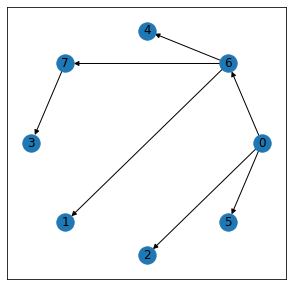

In [111]:
ptan = PTAN()
ptan.fit(p450_pu.X_1abeled_,p450_pu.X_Unlabeled_, p450_pu.prevalence_)
ptan.plot_tree_structure()
print(p450_pu.y_Unlabeled_[0:10])
print(ptan.predict(p450_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_pu.y_Unlabeled_,ptan.predict(p450_pu.X_Unlabeled_)) )
ptan.Conditional_log_likelihood(p450_pu.y_Unlabeled_,ptan.predict_proba(p450_pu.X_Unlabeled_))

##### lactamase

In [112]:
ptan = PTAN()
ptan.fit(lact_pu.X_1abeled_,lact_pu.X_Unlabeled_, lact_pu.prevalence_)
print(lact_pu.y_Unlabeled_[0:10])
print(ptan.predict(lact_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(lact_pu.y_Unlabeled_,ptan.predict(lact_pu.X_Unlabeled_)) )
ptan.Conditional_log_likelihood(lact_pu.y_Unlabeled_,ptan.predict_proba(lact_pu.X_Unlabeled_))

['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
0.9366666666666666


-191.80307061112694

## PSTAN

In [0]:
class PSTAN(Bayes_net_PU):
    name = "PSTAN"
    def __init__(self, alpha = 1,starting_node = 0):
      self.starting_node = starting_node
      self.alpha = alpha

    def Findparent(self, M):
      M = M.copy() # to avoid change global M
      np.fill_diagonal(M,0)  
      p = int(M.shape[0]) 
      V = range(p) # set of all nodes
      st = self.starting_node
      Vnew = [st]  # vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} # use a dict to show nodes' interdepedency
      while set(Vnew) != set(V): # when their are still nodes whose parents are unknown.
        index_i = [] # after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] # corresponding distance
        for i in range(len(Vnew)):  # can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [e for e in M[:,vnew]] # does not need int(e)
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] ## relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) # add in that node
        parent[index_i[index1]] = Vnew[index1] # add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      return parent

    
    def fit(self,X_L, X_u, pri, M):  # this is based on trainning data !!!
      X_L = check_array(X_L)
      X_u = check_array(X_u)
      if X_L.shape[1] != X_u.shape[1]:
        raise ValueError('labeled data and unlabeled data have different number of features ')
      n_L,p = X_L.shape
      n_u,p = X_u.shape
      parent = self.Findparent(M)
      # part 1: proba that can be estimated from labeled examples. 1 P(xij|1,xkl), 2 p(x_root|1) = N_L(x_root)/N_L,  P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
      # part 2: learn from U, N_U(xij,xkl), and N_U(xkl)
      # part 3: p(xij|0,xkl),p(x_root|0) from previous list
      #
      List_prob_1 = {} # 1 P(xij|1,xkl), 2 p(x_root|1)  
      List_count_1 = {} # N_L(xij,xpal) and N_L(xij)
      # 
      List_count_U = {} # N_U(xij,xkl) and N_U(xij)
      # 
      List_prob_0 = {} # p(xij|0,xkl),p(x_root|0)
      K = {}
      # for root node
      root_i = self.starting_node
      x_i_L = X_L[:,root_i]
      x_i_L_counter = Counter(x_i_L)
      x_i_u = X_u[:,root_i]
      x_i_u_counter = Counter(x_i_u)
      x_i_values = list(set(x_i_L_counter.keys()).union(x_i_u_counter.keys()))
      K[root_i] = len(list(x_i_values))
      # part 1 
      x_i_L_prob = {key: (x_i_L_counter[key]+self.alpha)/(K[root_i]*self.alpha + n_L ) for key in x_i_values}
      List_prob_1[root_i] = x_i_L_prob
      List_count_1[root_i] = x_i_L_counter
      # part 2 
      List_count_U[root_i] = x_i_u_counter
      # part 3 
      x_i_0_prob = {key: max([0,x_i_u_counter[key] - x_i_L_prob[key] * pri * n_u]) for key in x_i_values} # N_U(xi =j) - N_u*p(xij, y =1) = N_U(xij,y=0)   numeritor, can be negative, make it >=0
      x_i_0_prob = {key:(self.alpha + value)/ (K[root_i]*self.alpha + n_u * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
      x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
      List_prob_0[root_i] = x_i_0_prob
      #
      for i in [e for e in range(0,p) if e != root_i]:
        x_i_values = list(set(X_L[:,i]).union(X_u[:,i]))
        x_i_parent_Value = list(set(X_L[:,parent[i]]).union(X_u[:,parent[i] ] ) )
        K[i] = len(x_i_values)
        # part 1, P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
        List_count_1[i] = {v2: {v1:X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value} # {pva1: {'1': , '2':, '3': }, pval2:{}}
        List_prob_1[i] = {v2: {v1:(X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] + self.alpha)/ (X_L[(X_L[:,parent[i]] == v2)].shape[0] + self.alpha*K[i]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 2 
        List_count_U[i] = {v2: {v1:X_u[(X_u[:,i] == v1) & (X_u[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 3 
        x_i_0_prob = {v2: {v1: List_count_U[i][v2][v1] - List_prob_1[i][v2][v1]*pri* sum(list(List_count_U[i][v2].values())) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1: max([0,x_i_0_prob[v2][v1] ]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:(x_i_0_prob[v2][v1] + self.alpha)/(self.alpha*K[i] + (1-pri)*sum(list(List_count_U[i][v2].values())) ) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:x_i_0_prob[v2][v1]/sum(list(x_i_0_prob[v2].values()))  for v1 in x_i_values} for v2 in x_i_parent_Value} # normalize 
        List_prob_0[i] = x_i_0_prob
      self.is_fitted_ = True  
      self.parent_ = parent
      self.n_features_, self.K_, self.List_count_1_,self.List_prob_1_, self.List_count_U_, self.List_prob_0_, self.prevalence_ = p, K, List_count_1,List_prob_1,List_count_U,List_prob_0, pri
      return self
      
    def predict_proba(self,X):	
      check_is_fitted(self)
      X = check_array(X)
      Prob_1 = []
      root_i = self.starting_node
      for ins in X:
        P1 = self.prevalence_
        P0 = 1 - P1
        # root_i
        P1 = P1 * (self.List_prob_1_[root_i][ins[root_i]])
        P0 = P0 * (self.List_prob_0_[root_i][ins[root_i]])
        for i in [e for e in range(0,self.n_features_) if e != root_i]:
          pValue = ins[self.parent_[i]]
          P1 = P1 * (self.List_prob_1_[i][pValue][ins[i]])
          P0 = P0 * (self.List_prob_0_[i][pValue][ins[i]])
        P = P1 + P0
        P1 = P1/P; P0 = P0/P
        Prob_1.append(P1)
      #
      Prob_1 = np.array(Prob_1)
      return Prob_1


##### P450

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['0' '1' '1' '1' '1' '1' '1' '1' '0' '0']
0.815


-568.8935857929174

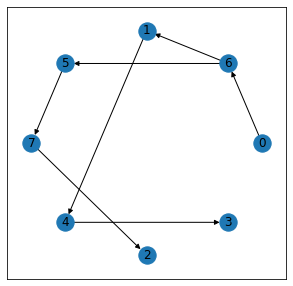

In [114]:
pstan = PSTAN()
pstan.fit(p450_pu.X_1abeled_,p450_pu.X_Unlabeled_, p450_pu.prevalence_,M)
pstan.plot_tree_structure()
print(p450_pu.y_Unlabeled_[0:10])
print(pstan.predict(p450_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_pu.y_Unlabeled_,pstan.predict(p450_pu.X_Unlabeled_)) )
pstan.Conditional_log_likelihood(p450_pu.y_Unlabeled_,pstan.predict_proba(p450_pu.X_Unlabeled_))

##### lactmase

['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
0.9316666666666666


-194.28433069308144

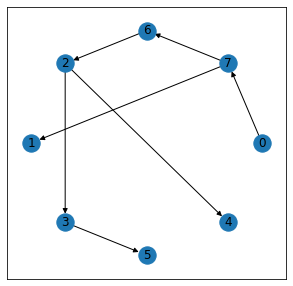

In [115]:
pstan = PSTAN()
pstan.fit(lact_pu.X_1abeled_,lact_pu.X_Unlabeled_, lact_pu.prevalence_,M2)
pstan.plot_tree_structure()
print(lact_pu.y_Unlabeled_[0:10])
print(pstan.predict(lact_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(lact_pu.y_Unlabeled_,pstan.predict(lact_pu.X_Unlabeled_)) )
pstan.Conditional_log_likelihood(lact_pu.y_Unlabeled_,pstan.predict_proba(lact_pu.X_Unlabeled_))

### PSTAN_bagging

In [0]:
class PESTAN(Bayes_net_PU):
  name = "PESTAN"
  def __init__(self,alpha = 1):
    self.alpha = alpha

  def fit(self,X_L, X_u, pri, M): 
    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    n_L,p = X_L.shape
    n_u,p = X_u.shape
    models = []
    ## train p PSTAN base models
    for i in range(p):
      model = PSTAN(self.alpha, starting_node= i)
      model.fit(X_L, X_u, pri, M)
      models.append(model)
  
    self.models_, self.n_features_ = models, p
    self.is_fitted_ = True
    return self

  def predict_proba(self,X):	   
    check_is_fitted(self)
    X = check_array(X)

    Prob_1 = 0
    for model in self.models_:
      Prob_1 += model.predict_proba(X) # np array here 

    Prob_1 = Prob_1/(self.n_features_)
    return(Prob_1)

  

##### P450

In [58]:
pestan = PESTAN()
pestan.fit(p450_pu.X_1abeled_,p450_pu.X_Unlabeled_, p450_pu.prevalence_,M)
print(p450_pu.y_Unlabeled_[0:10])
print(pestan.predict(p450_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_pu.y_Unlabeled_,pestan.predict(p450_pu.X_Unlabeled_)) )
pestan.Conditional_log_likelihood(p450_pu.y_Unlabeled_,pestan.predict_proba(p450_pu.X_Unlabeled_))

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['0' '1' '1' '1' '1' '1' '1' '1' '0' '0']
0.80625


-601.3841136700062

## PETAN

In [0]:
class PETAN(Bayes_net_PU):
  name = "PETAN"
  def __init__(self,alpha = 1):
    self.alpha = alpha

  def fit(self,X_L, X_u, pri, M): 
    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    n_L,p = X_L.shape
    n_u,p = X_u.shape
    models = []
    ## train p PTAN base models
    for i in range(p):
      model = PTAN(self.alpha, starting_node= i)
      model.fit(X_L, X_u, pri)
      models.append(model)
    
    #append STAN
    model = PSTAN(self.alpha, starting_node = 0) #
    model.fit(X_L, X_u, pri, M)
    models.append(model)    
    self.models_, self.n_features_ = models, p
    self.is_fitted_ = True
    return self

  def predict_proba(self,X):	   
    check_is_fitted(self)
    X = check_array(X)

    Prob_1 = 0
    for model in self.models_:
      Prob_1 += model.predict_proba(X) # np array here 

    Prob_1 = Prob_1/(self.n_features_+ 1)
    return(Prob_1)

  

##### P450

In [56]:
petan = PETAN()
petan.fit(p450_pu.X_1abeled_,p450_pu.X_Unlabeled_, p450_pu.prevalence_,M)
print(p450_pu.y_Unlabeled_[0:10])
print(petan.predict(p450_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_pu.y_Unlabeled_,petan.predict(p450_pu.X_Unlabeled_)) )
petan.Conditional_log_likelihood(p450_pu.y_Unlabeled_,petan.predict_proba(p450_pu.X_Unlabeled_))

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['0' '1' '1' '1' '1' '1' '1' '1' '0' '0']
0.7975


-572.8920619653228

##### lactamase

In [51]:
petan = PETAN()
petan.fit(lact_pu.X_1abeled_,lact_pu.X_Unlabeled_, lact_pu.prevalence_,M2)
print(lact_pu.y_Unlabeled_[0:10])
print(petan.predict(lact_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(lact_pu.y_Unlabeled_,petan.predict(lact_pu.X_Unlabeled_)) )
petan.Conditional_log_likelihood(lact_pu.y_Unlabeled_,petan.predict_proba(lact_pu.X_Unlabeled_))

['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
0.92


-202.8681478820329

# Multiple runs 

In [0]:
def get_cv(cls,X,y,nl,nu,M = None,runs=10,verbose = True,random_state = 42,pos_label = '1'):  
  """ Get CLL, accuracy, precision, recall under multiple runs
      Parameters
      ----------
      cls:  ___{PNB, PTAN,PSTAN}___
            Model class
      X : {array-like, sparse matrix}, shape (n_samples, n_features)
            Feature matrix.
      Y : {array-like, sparse matrix}, shape (n_samples,)
            Target.
      M : {array-like, sparse matrix}, shape (n_features, n_features)
            Contact matrix
      nl : Scalar
            Number of labeled examples
      nu : Scalar
            Number of Unlabeled examples
      runs : Scalar
            Number of runs, all metrics are average of all runs.
      random_state : Scalar
            Random state on PU generator, make results reproducible
      Pos_label : str type
            Positive label in data. Default is '1'
      Returns
      -------
      CLL, accuracy, precision, recall of all runs.
      
  """
  X,y = check_X_y(X,y)
  Accuracy = []
  Precision = []
  Recall = []
  CLL = []
  for i in range(runs):
    # generate PU data
    pu_object = PUgenerator()
    pu_object.fit(X,y,nl,nu,random_state*(i+1),pos_label)  
    model = cls()
    model.fit(pu_object.X_1abeled_,pu_object.X_Unlabeled_, pu_object.prevalence_,M)
    Accuracy.append(accuracy_score(pu_object.y_Unlabeled_,model.predict(pu_object.X_Unlabeled_)) )
    CLL.append(model.Conditional_log_likelihood(pu_object.y_Unlabeled_,model.predict_proba(pu_object.X_Unlabeled_)) )
    Precision.append(precision_score(pu_object.y_Unlabeled_,model.predict(pu_object.X_Unlabeled_), 
         average='macro') )
    Recall.append(recall_score(pu_object.y_Unlabeled_,model.predict(pu_object.X_Unlabeled_), 
         average='macro' ) )
    if verbose:
        print("accuracy in %s -th run is %s" % (i+1,Accuracy[i]) )
        print("CLL in %s -th run is %s" % (i+1,CLL[i]))
        print("Precision in %s -th run is %s" % (i+1,Precision[i]) )
        print("Recall in %s -th run is %s" % (i+1,Recall[i]) )
        print(10*'__')
  return np.array(Accuracy), np.array(CLL), np.array(Precision),np.array(Recall)

##### car

In [169]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X6,y6,400,1500,pos_label='acc')
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8293333333333334
CLL in 1 -th run is -629.1745927171219
Precision in 1 -th run is 0.7415594649637203
Recall in 1 -th run is 0.6924099027495862
____________________
accuracy in 2 -th run is 0.8166666666666667
CLL in 2 -th run is -631.3752097937174
Precision in 2 -th run is 0.741594766476283
Recall in 2 -th run is 0.6826112249350014
____________________
accuracy in 3 -th run is 0.8213333333333334
CLL in 3 -th run is -665.8812859131559
Precision in 3 -th run is 0.7335382511149757
Recall in 3 -th run is 0.6701627486437614
____________________
accuracy in 4 -th run is 0.8206666666666667
CLL in 4 -th run is -648.1114438135272
Precision in 4 -th run is 0.7610124365490434
Recall in 4 -th run is 0.6991229627000326
____________________
accuracy in 5 -th run is 0.8126666666666666
CLL in 5 -th run is -658.6394591517569
Precision in 5 -th run is 0.7626540148271901
Recall in 5 -th run is 0.691483237425988
____________________
accuracy in 6 -th run is 0.8093333333333333
CLL

In [170]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X6,y6,400,1500,pos_label='acc')
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9213333333333333
CLL in 1 -th run is -419.49245053119097
Precision in 1 -th run is 0.8875222258287829
Recall in 1 -th run is 0.866580258084501
____________________
accuracy in 2 -th run is 0.9193333333333333
CLL in 2 -th run is -457.49078916583
Precision in 2 -th run is 0.9005772022135534
Recall in 2 -th run is 0.8605175400772075
____________________
accuracy in 3 -th run is 0.9073333333333333
CLL in 3 -th run is -479.18526407260896
Precision in 3 -th run is 0.8738792107738655
Recall in 3 -th run is 0.8364677516576251
____________________
accuracy in 4 -th run is 0.924
CLL in 4 -th run is -439.7879294341859
Precision in 4 -th run is 0.9201196922200057
Recall in 4 -th run is 0.8633862809477327
____________________
accuracy in 5 -th run is 0.92
CLL in 5 -th run is -460.76518151030126
Precision in 5 -th run is 0.9211554473835906
Recall in 5 -th run is 0.8597691087158724
____________________
accuracy in 6 -th run is 0.9006666666666666
CLL in 6 -th run is -423.104

##### nurse

In [163]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X3,y3,1000,10000,pos_label='very_recom')
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9811
CLL in 1 -th run is -502.1716273823139
Precision in 1 -th run is 0.9682492100055446
Recall in 1 -th run is 0.6278461538461538
____________________
accuracy in 2 -th run is 0.9809
CLL in 2 -th run is -530.700214843131
Precision in 2 -th run is 0.9903836471654415
Recall in 2 -th run is 0.6326923076923077
____________________
accuracy in 3 -th run is 0.981
CLL in 3 -th run is -486.46921361424546
Precision in 3 -th run is 0.9904493817231326
Recall in 3 -th run is 0.6090534979423868
____________________
accuracy in 4 -th run is 0.9803
CLL in 4 -th run is -512.5290976154945
Precision in 4 -th run is 0.9688030499208747
Recall in 4 -th run is 0.6281984705015463
____________________
accuracy in 5 -th run is 0.9805
CLL in 5 -th run is -503.1176879102703
Precision in 5 -th run is 0.9776149300996863
Recall in 5 -th run is 0.6424898176696738
____________________
accuracy in 6 -th run is 0.9801
CLL in 6 -th run is -510.21971103117096
Precision in 6 -th run is 0.968074

In [164]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X3,y3,1000,10000,pos_label='very_recom')
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9895
CLL in 1 -th run is -287.17843709796125
Precision in 1 -th run is 0.9848880344863061
Recall in 1 -th run is 0.7958461538461539
____________________
accuracy in 2 -th run is 0.9872
CLL in 2 -th run is -301.3840081808706
Precision in 2 -th run is 0.9935143899473045
Recall in 2 -th run is 0.7538461538461538
____________________
accuracy in 3 -th run is 0.9878
CLL in 3 -th run is -288.4489461198179
Precision in 3 -th run is 0.9938252859601174
Recall in 3 -th run is 0.7489711934156379
____________________
accuracy in 4 -th run is 0.9877
CLL in 4 -th run is -299.5680490137381
Precision in 4 -th run is 0.9902419588525065
Recall in 4 -th run is 0.7662321849309114
____________________
accuracy in 5 -th run is 0.9883
CLL in 5 -th run is -298.3902551657672
Precision in 5 -th run is 0.9940591042957245
Recall in 5 -th run is 0.7833333333333333
____________________
accuracy in 6 -th run is 0.9878
CLL in 6 -th run is -297.76024935263746
Precision in 6 -th run is 0.9903

##### German

In [147]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X15,y15,400,900)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.7144444444444444
CLL in 1 -th run is -973.4567728199333
Precision in 1 -th run is 0.6509531972365072
Recall in 1 -th run is 0.661747971502078
____________________
accuracy in 2 -th run is 0.7088888888888889
CLL in 2 -th run is -1033.8284241163624
Precision in 2 -th run is 0.6569759273136007
Recall in 2 -th run is 0.6556925863991081
____________________
accuracy in 3 -th run is 0.7377777777777778
CLL in 3 -th run is -1116.3460478672994
Precision in 3 -th run is 0.7026955192806043
Recall in 3 -th run is 0.7054623829729911
____________________
accuracy in 4 -th run is 0.7366666666666667
CLL in 4 -th run is -886.5042120732192
Precision in 4 -th run is 0.6847898107929029
Recall in 4 -th run is 0.69609375
____________________
accuracy in 5 -th run is 0.6811111111111111
CLL in 5 -th run is -1114.9804536400786
Precision in 5 -th run is 0.6321371610845294
Recall in 5 -th run is 0.6518409686543548
____________________
accuracy in 6 -th run is 0.7088888888888889
CLL in 

In [0]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X15,y15,400,900)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

##### Vote

In [143]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X11,y11,100,400,pos_label = "'democrat'")
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8975
CLL in 1 -th run is -343.49616337544023
Precision in 1 -th run is 0.8843749999999999
Recall in 1 -th run is 0.901621724578923
____________________
accuracy in 2 -th run is 0.93
CLL in 2 -th run is -228.17844191336928
Precision in 2 -th run is 0.924789269031029
Recall in 2 -th run is 0.9286372613561553
____________________
accuracy in 3 -th run is 0.9075
CLL in 3 -th run is -354.81900016448634
Precision in 3 -th run is 0.8983567589913187
Recall in 3 -th run is 0.9100640974494003
____________________
accuracy in 4 -th run is 0.89
CLL in 4 -th run is -360.5338708749702
Precision in 4 -th run is 0.8821584782829824
Recall in 4 -th run is 0.894808743169399
____________________
accuracy in 5 -th run is 0.8825
CLL in 5 -th run is -398.1398068621564
Precision in 5 -th run is 0.8694373401534528
Recall in 5 -th run is 0.8930505292372997
____________________
accuracy in 6 -th run is 0.8875
CLL in 6 -th run is -425.43555631858374
Precision in 6 -th run is 0.879883945

In [144]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X11,y11,100,400,pos_label = "'democrat'")
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.885
CLL in 1 -th run is -275.8350620866397
Precision in 1 -th run is 0.8786862334032146
Recall in 1 -th run is 0.8686294250496585
____________________
accuracy in 2 -th run is 0.9225
CLL in 2 -th run is -213.6423460386917
Precision in 2 -th run is 0.9179802437999159
Recall in 2 -th run is 0.9189598420013166
____________________
accuracy in 3 -th run is 0.915
CLL in 3 -th run is -304.6124415171523
Precision in 3 -th run is 0.9136894234170498
Recall in 3 -th run is 0.9043591584882577
____________________
accuracy in 4 -th run is 0.9
CLL in 4 -th run is -169.73687318203477
Precision in 4 -th run is 0.8932980599647267
Recall in 4 -th run is 0.8983816729718369
____________________
accuracy in 5 -th run is 0.8675
CLL in 5 -th run is -289.21417116681346
Precision in 5 -th run is 0.8696428571428572
Recall in 5 -th run is 0.8379499877554353
____________________
accuracy in 6 -th run is 0.905
CLL in 6 -th run is -304.31191798031256
Precision in 6 -th run is 0.903689403

##### lymph

In [135]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X10,y10,50,100,pos_label = 'malign_lymph')
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.73
CLL in 1 -th run is -124.21682798313698
Precision in 1 -th run is 0.7567911714770799
Recall in 1 -th run is 0.7444444444444445
____________________
accuracy in 2 -th run is 0.79
CLL in 2 -th run is -81.82474196120687
Precision in 2 -th run is 0.8023809523809524
Recall in 2 -th run is 0.7625051674245555
____________________
accuracy in 3 -th run is 0.76
CLL in 3 -th run is -84.80969983418406
Precision in 3 -th run is 0.7616645649432534
Recall in 3 -th run is 0.7515151515151515
____________________
accuracy in 4 -th run is 0.79
CLL in 4 -th run is -64.86242778984426
Precision in 4 -th run is 0.811025311025311
Recall in 4 -th run is 0.79
____________________
accuracy in 5 -th run is 0.84
CLL in 5 -th run is -81.15588330085994
Precision in 5 -th run is 0.8421528720036182
Recall in 5 -th run is 0.8179907524169819
____________________
accuracy in 6 -th run is 0.87
CLL in 6 -th run is -47.58364058711688
Precision in 6 -th run is 0.8802197802197802
Recall in 6 -th

In [136]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X10,y10,50,100,pos_label = 'malign_lymph')
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.73
CLL in 1 -th run is -170.0349098893656
Precision in 1 -th run is 0.7976190476190477
Recall in 1 -th run is 0.7525252525252525
____________________
accuracy in 2 -th run is 0.78
CLL in 2 -th run is -172.27447643447653
Precision in 2 -th run is 0.8266516092603049
Recall in 2 -th run is 0.7391484084332369
____________________
accuracy in 3 -th run is 0.74
CLL in 3 -th run is -147.38480338922125
Precision in 3 -th run is 0.7434577434577434
Recall in 3 -th run is 0.7292929292929293
____________________
accuracy in 4 -th run is 0.77
CLL in 4 -th run is -113.46687516043254
Precision in 4 -th run is 0.7967032967032968
Recall in 4 -th run is 0.77
____________________
accuracy in 5 -th run is 0.87
CLL in 5 -th run is -82.38532854845506
Precision in 5 -th run is 0.8729946524064172
Recall in 5 -th run is 0.851828499369483
____________________
accuracy in 6 -th run is 0.83
CLL in 6 -th run is -112.82629350059975
Precision in 6 -th run is 0.8501636278634876
Recall in 6 

##### P450

In [117]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X,y,400,800,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.805
CLL in 1 -th run is -524.7846955096054
Precision in 1 -th run is 0.7858937198067633
Recall in 1 -th run is 0.760888732146006
____________________
accuracy in 2 -th run is 0.79375
CLL in 2 -th run is -532.6124641351781
Precision in 2 -th run is 0.7895188012700756
Recall in 2 -th run is 0.753869593355625
____________________
accuracy in 3 -th run is 0.79625
CLL in 3 -th run is -542.042931321097
Precision in 3 -th run is 0.7825704225352113
Recall in 3 -th run is 0.7561657688894392
____________________
accuracy in 4 -th run is 0.77875
CLL in 4 -th run is -534.8863579391842
Precision in 4 -th run is 0.7676204215072855
Recall in 4 -th run is 0.718304367201426
____________________
accuracy in 5 -th run is 0.79
CLL in 5 -th run is -551.7469671631212
Precision in 5 -th run is 0.7658904579319804
Recall in 5 -th run is 0.7420471636539061
____________________
accuracy in 6 -th run is 0.78875
CLL in 6 -th run is -508.5590145904492
Precision in 6 -th run is 0.783901296

In [118]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X,y,400,800,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.79375
CLL in 1 -th run is -622.0952038629258
Precision in 1 -th run is 0.7696327641376836
Recall in 1 -th run is 0.7543819432198906
____________________
accuracy in 2 -th run is 0.775
CLL in 2 -th run is -690.3375148980411
Precision in 2 -th run is 0.7707728621096616
Recall in 2 -th run is 0.728912738647395
____________________
accuracy in 3 -th run is 0.7925
CLL in 3 -th run is -589.6252136201911
Precision in 3 -th run is 0.7752160323588895
Recall in 3 -th run is 0.7574487991799613
____________________
accuracy in 4 -th run is 0.78375
CLL in 4 -th run is -613.9305228809405
Precision in 4 -th run is 0.7685902573693115
Recall in 4 -th run is 0.7310049019607843
____________________
accuracy in 5 -th run is 0.8
CLL in 5 -th run is -667.2777806211338
Precision in 5 -th run is 0.7747267395361237
Recall in 5 -th run is 0.7631885127273759
____________________
accuracy in 6 -th run is 0.7875
CLL in 6 -th run is -654.5389571483994
Precision in 6 -th run is 0.779729485

In [119]:
Accuracy, CLL, Precision,Recall = get_cv(PSTAN,X,y,400,800,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.815
CLL in 1 -th run is -568.8935857929174
Precision in 1 -th run is 0.8007445992838567
Recall in 1 -th run is 0.7683653676600246
____________________
accuracy in 2 -th run is 0.815
CLL in 2 -th run is -550.7921823656503
Precision in 2 -th run is 0.8207762557077626
Recall in 2 -th run is 0.77278610721605
____________________
accuracy in 3 -th run is 0.77875
CLL in 3 -th run is -603.4766881735685
Precision in 3 -th run is 0.7609178218718855
Recall in 3 -th run is 0.7377355375312158
____________________
accuracy in 4 -th run is 0.79875
CLL in 4 -th run is -553.1641109307191
Precision in 4 -th run is 0.7840284778718183
Recall in 4 -th run is 0.7530637254901962
____________________
accuracy in 5 -th run is 0.80375
CLL in 5 -th run is -579.3198680446674
Precision in 5 -th run is 0.779942442161117
Recall in 5 -th run is 0.7649975878997701
____________________
accuracy in 6 -th run is 0.79
CLL in 6 -th run is -625.0952523646882
Precision in 6 -th run is 0.7802507861

##### lactamase

In [120]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X2,y2,300,600,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8683333333333333
CLL in 1 -th run is -289.0884739393357
Precision in 1 -th run is 0.829229797979798
Recall in 1 -th run is 0.7186621010150422
____________________
accuracy in 2 -th run is 0.8566666666666667
CLL in 2 -th run is -296.16991037706885
Precision in 2 -th run is 0.8211233211233211
Recall in 2 -th run is 0.6686377885437447
____________________
accuracy in 3 -th run is 0.8116666666666666
CLL in 3 -th run is -320.46555490003607
Precision in 3 -th run is 0.7056397978185687
Recall in 3 -th run is 0.6192983057822896
____________________
accuracy in 4 -th run is 0.865
CLL in 4 -th run is -287.36069536123426
Precision in 4 -th run is 0.8287037037037037
Recall in 4 -th run is 0.6909457642312864
____________________
accuracy in 5 -th run is 0.8466666666666667
CLL in 5 -th run is -291.4701813437224
Precision in 5 -th run is 0.822750986130551
Recall in 5 -th run is 0.6698814546915812
____________________
accuracy in 6 -th run is 0.8783333333333333
CLL in 6 -th 

In [121]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X2,y2,300,600,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9366666666666666
CLL in 1 -th run is -191.80307061112694
Precision in 1 -th run is 0.9138973668745616
Recall in 1 -th run is 0.8814444696797639
____________________
accuracy in 2 -th run is 0.9233333333333333
CLL in 2 -th run is -187.73750814026846
Precision in 2 -th run is 0.9091503267973856
Recall in 2 -th run is 0.8344970076944999
____________________
accuracy in 3 -th run is 0.9166666666666666
CLL in 3 -th run is -204.1714122546455
Precision in 3 -th run is 0.8841463414634146
Recall in 3 -th run is 0.8500240071335483
____________________
accuracy in 4 -th run is 0.9166666666666666
CLL in 4 -th run is -190.14689269667372
Precision in 4 -th run is 0.8954022735768157
Recall in 4 -th run is 0.8224114746750336
____________________
accuracy in 5 -th run is 0.9316666666666666
CLL in 5 -th run is -176.21264896114096
Precision in 5 -th run is 0.9103323581254202
Recall in 5 -th run is 0.8780892103676914
____________________
accuracy in 6 -th run is 0.935
CLL in 6 -

In [122]:
Accuracy, CLL, Precision,Recall = get_cv(PSTAN,X2,y2,300,600,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9316666666666666
CLL in 1 -th run is -194.28433069308144
Precision in 1 -th run is 0.8934700049229904
Recall in 1 -th run is 0.8909746850923321
____________________
accuracy in 2 -th run is 0.91
CLL in 2 -th run is -195.2997057914913
Precision in 2 -th run is 0.8678242381289866
Recall in 2 -th run is 0.8327871188372755
____________________
accuracy in 3 -th run is 0.9083333333333333
CLL in 3 -th run is -206.85736138691382
Precision in 3 -th run is 0.8636934110264456
Recall in 3 -th run is 0.847846217161671
____________________
accuracy in 4 -th run is 0.9283333333333333
CLL in 4 -th run is -191.14720796825006
Precision in 4 -th run is 0.901
Recall in 4 -th run is 0.8594800537875392
____________________
accuracy in 5 -th run is 0.91
CLL in 5 -th run is -186.85507951461275
Precision in 5 -th run is 0.8657495256166983
Recall in 5 -th run is 0.8614627285513361
____________________
accuracy in 6 -th run is 0.9283333333333333
CLL in 6 -th run is -175.4378777349506
